In [1]:
import pandas as pd

In [3]:
fpath = 'data/prep/'
dfile = 'form_data.csv'

In [726]:
df = pd.read_csv(fpath+dfile,header=0,parse_dates=True)

In [728]:
df.head()

,RaceId,CourseName,RaceDate,RaceTime,Class,Prize,FieldSize,Distance,RaceWinTime,Posn,...,RT,AgeMin,AgeMax,AW,Going1,Going1N,Won,Placed,ReturnWin,ReturnPlace
0,42370101,Catterick,2016-01-01,12:30:00,4.0,5198.0,12,4246,305.0,1,...,NvH,4.0,NaN,False,soft,5.0,True,0.2,5.5,1.90
1,42370101,Catterick,2016-01-01,12:30:00,4.0,5198.0,12,4246,305.0,2,...,NvH,4.0,NaN,False,soft,5.0,False,0.2,0.0,1.80
2,42370101,Catterick,2016-01-01,12:30:00,4.0,5198.0,12,4246,305.0,3,...,NvH,4.0,NaN,False,soft,5.0,False,0.2,0.0,1.22
3,42370101,Catterick,2016-01-01,12:30:00,4.0,5198.0,12,4246,305.0,4,...,NvH,4.0,NaN,False,soft,5.0,False,0.0,0.0,0.00
4,42370101,Catterick,2016-01-01,12:30:00,4.0,5198.0,12,4246,305.0,5,...,NvH,4.0,NaN,False,soft,5.0,False,0.0,0.0,0.00


In [30]:
dfH = df[df.RT.apply(lambda x: x in ('HcH','NvHcH','NvH','MdH','H'))]\
# add M(ares)
    [['HorseName','WeightLBS','OR','Allow',
      # 'Trainer','Jockey',
      'RaceDate','Distance','Going1N','CourseName','FieldSize','Posn','Comments']]

In [32]:
dfH

,HorseName,WeightLBS,OR,Allow,RaceDate,Distance,Going1N,CourseName,FieldSize,Posn,Comments
0,Lady Yeats,153,120.0,3,2016-01-01,4246,5.0,Catterick,12,1,led headed narrowly 2 out ridden and every cha...
1,Nam Hai,153,NaN,3,2016-01-01,4246,5.0,Catterick,12,2,in touch effort 2 out driven and every chance ...
2,Fort Smith,149,124.0,7,2016-01-01,4246,5.0,Catterick,12,3,tracked winner led narrowly 2 out hung left be...
3,Lough Salt,151,NaN,5,2016-01-01,4246,5.0,Catterick,12,4,tracked leaders effort 2 out every chance when...
4,Cactus Valley,153,NaN,3,2016-01-01,4246,5.0,Catterick,12,5,held up behind pushed along 2 out stayed on ap...
...,...,...,...,...,...,...,...,...,...,...,...
1084539,Destivelle,161,84.0,0,2024-12-31,3609,5.0,Punchestown,18,14,"towards rear, headway in 11th after 5th, lost ..."
1084540,Shing Shilla,164,87.0,0,2024-12-31,3609,5.0,Punchestown,18,15,"close up, 3rd after 4th, 4th before 4 out, los..."
1084541,Petit Dejeuner,164,87.0,0,2024-12-31,3609,5.0,Punchestown,18,16,"tracked leader, led at 1st, increased lead bef..."
1084542,Carslake,159,82.0,0,2024-12-31,3609,5.0,Punchestown,18,17,"tracked leader, under pressure in 5th after 4t..."


In [114]:
dfCh = df[df.RT.apply(lambda x: x in ('HcCh','NvHcCh','NvCh','MdCh','Ch','HcChM','NvHcChM','NvChM','MdChM','ChM'))]\
    [['HorseName','WeightLBS','OR','Allow','RT','ReturnWin','ReturnPlace',
      # 'Trainer','Jockey',
      'RaceDate','Distance','Going1N','CourseName','FieldSize','Posn','Comments']]

In [42]:
# dfCh.RT.value_counts()

In [166]:
# previous comments for Crs Gng RT
a = dfCh[(dfCh.CourseName=='Warwick') & (dfCh.Going1N==3.0) & (dfCh.RT=='NvHcCh')]\
            [['HorseName','RaceDate','ReturnWin','ReturnPlace']]
b = a.merge(dfCh[['HorseName','RaceDate','Comments']],on='HorseName',how='left')
c = b[b.RaceDate_y<b.RaceDate_x]
comments = c['Comments'].reset_index(drop=True)
# print(comments)
# print(pd.Series(sorted([' '.join(x.split(' ')[:2])\
#           for x in list(comments)])).value_counts()) # first two words
# a = pd.Series(sorted([x.split(' ')[0]\
#           for x in list(comments)])).value_counts() # first word
# a/sum(a)

In [312]:
y = ((c.ReturnWin>1)|(c.ReturnPlace>2)).reset_index(drop=True)

In [347]:
# bag-of-words
# set(' '.join(list(comments)))
bow1p = [ x.replace(',','').replace('(','').replace(')','').lower().split(' ') for x in comments[y] ]
bow1n = [ x.replace(',','').replace('(','').replace(')','').lower().split(' ') for x in comments[~y] ]

In [349]:
bow2p = [ x for xx in bow1p for x in xx  ]
wdsp = set(bow2p)
bow2n = [ x for xx in bow1n for x in xx  ]
wdsn = set(bow2n)

In [351]:
wds_freqp = pd.Series(bow2p).value_counts().reset_index().rename({'index':'wd','count':'freq'},axis=1)
wds_freqn = pd.Series(bow2n).value_counts().reset_index().rename({'index':'wd','count':'freq'},axis=1)

In [353]:
wds_freq1p = wds_freqp[wds_freqp.freq>1]
wds_freq1n = wds_freqn[wds_freqn.freq>1]

In [355]:
DFp = [ sum([xx.find(x)>1 for xx in comments[y]]) for x in wds_freq1p.wd ]
DFn = [ sum([xx.find(x)>1 for xx in comments[~y]]) for x in wds_freq1n.wd ]

In [357]:
wds_freq1p.insert(2,'DF',DFp)
wds_freq1n.insert(2,'DF',DFn)

In [359]:
wds_freq1p.insert(3,'TFIDF',wds_freq1p.freq/wds_freq1p.DF)
wds_freq1n.insert(3,'TFIDF',wds_freq1n.freq/wds_freq1n.DF)

In [435]:
# pd.concat([wds_freq1p.head(40),wds_freq1n.head(40)],axis=1)
d = wds_freq1p.merge(wds_freq1n,on='wd',how='left')
d['rDF_x'] = d['DF_x']/sum(y)
d['rDF_y'] = d['DF_y']/sum(~y)
# d[['wd','rDF_x','rDF_y']]

In [447]:
d['r'] = d.rDF_x/d.rDF_y
e = d[d.rDF_y.isna()|(d.r>1.5)]

In [465]:
e.sort_values('DF_x',ascending=False).head(20)

,wd,freq_x,DF_x,TFIDF_x,freq_y,DF_y,TFIDF_y,rDF_x,rDF_y,r
16,when,58,52,1.115385,77.0,73.0,1.054795,0.237443,0.148676,1.597048
90,all,11,38,0.289474,8.0,48.0,0.166667,0.173516,0.097760,1.774924
32,impression,33,33,1.000000,49.0,49.0,1.000000,0.150685,0.099796,1.509925
33,flat,33,33,1.000000,37.0,37.0,1.000000,0.150685,0.075356,1.999630
41,stayed,29,29,1.000000,41.0,41.0,1.000000,0.132420,0.083503,1.585811
47,clear,24,23,1.043478,34.0,31.0,1.096774,0.105023,0.063136,1.663426
51,extra,22,22,1.000000,30.0,29.0,1.034483,0.100457,0.059063,1.700835
54,run-in,19,19,1.000000,21.0,21.0,1.000000,0.086758,0.042770,2.028484
122,challenge,6,18,0.333333,11.0,21.0,0.523810,0.082192,0.042770,1.921722
59,same,17,17,1.000000,17.0,17.0,1.000000,0.077626,0.034623,2.242009


In [391]:
X = [ len(set(x.split(' ')).intersection(set(['tracked','impression','stayed','clear','extra']))) for x in comments ]

In [421]:
cc = c.reset_index(drop=True)
cc.insert(6,'X',X)
cc.insert(7,'y',y)

In [425]:
# c.drop(['X','y'],inplace=True,axis=1)

In [429]:
dd = cc[['HorseName','X','y']].groupby('HorseName').sum()

In [431]:
dd[dd.y>0]

,X,y
HorseName,,
Abidjan (FR),3,5
Barrakhov,0,5
Bells Of Stamford,1,2
Bempton Cliffs,2,3
Beyond The Clouds,10,10
Boughtbeforelunch,3,5
By Rail,0,1
Coopers Square,10,4
Danseur Du Large (FR),5,5


Snippet 3 below shows how you can train your own doc2Vec models on a custom corpus:

Le, Q. V., Mikolov, T., 2014, Distributed representations of sentences and documents. ArXiv, abs/1405.4053.
Available at: https://arxiv.org/abs/1405.4053.

In [469]:
!pip install -U -q "gensim"

In [1240]:
import gensim
gensim.__version__

'4.3.3'

In [475]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

In [477]:
#train model on a sequence of documents tagged with their IDs
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=8, window=3, min_count=1, workers=6)

In [479]:
# persist model to disk, and load it to infer on new documents
model_file = get_tmpfile("Doc2Vec_v1")
model.save(model_file)
model = Doc2Vec.load(model_file)
model.infer_vector(["human", "interface"])

array([ 0.00528195, -0.03031922, -0.03935448, -0.00905369,  0.05565676,
       -0.00111594, -0.0201578 ,  0.04316783], dtype=float32)

## Comments Doc2Vec embedding and similarity scores

In [591]:
# get all chars in Comments
# set(''.join([str(c) for c in list(dfH.Comments.values)]))

In [1082]:
# https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
import string
df['comments'] = df.Comments.apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))

In [1084]:
texts = [ str(c).split() for c in list(df.comments.values) ]

In [1188]:
#train model on a sequence of documents tagged with their IDs
# https://arxiv.org/pdf/1405.4053
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]
# model = Doc2Vec(documents, vector_size=8, window=3, min_count=1, workers=6)
# model = Doc2Vec(documents, workers=7)
# https://radimrehurek.com/gensim/models/doc2vec.html
model = Doc2Vec(documents, dm=1, vector_size=50, window=2, min_count=3, sample=1e-5, hs=1, workers=7)

In [1190]:
# persist model to disk, and load it to infer on new documents
model_file = get_tmpfile("Doc2Vec_v4")
model.save(model_file)

In [1192]:
# persist model to disk, and load it to infer on new documents
model = Doc2Vec.load(model_file)
model.infer_vector(dfCh.Comments.values[0].split())

array([ 0.1345618 , -0.0728581 , -0.05810495,  0.13027653, -0.12507442,
       -0.1602849 ,  0.03158674,  0.23542508, -0.4111657 ,  0.08480563,
        0.01208495,  0.07843297,  0.22090654,  0.17435308, -0.07564621,
       -0.10051873, -0.05551881,  0.07778135,  0.14151902, -0.04161229,
       -0.40912604, -0.16981234,  0.2483861 ,  0.1041811 ,  0.2107344 ,
        0.04211685, -0.07242022,  0.11495306, -0.21734267, -0.03360191,
       -0.08185735,  0.18868686,  0.18814795,  0.19736478, -0.20631649,
       -0.07998107, -0.00814012,  0.20116162,  0.17469625,  0.03922555,
        0.0478582 ,  0.14959729,  0.11733712, -0.13404277,  0.06600966,
       -0.14339781, -0.0667136 ,  0.10617378, -0.03536946,  0.28450716],
      dtype=float32)

In [1194]:
# embeddings for runners in 7apr25 2.15 Kel 22.5f HcH Cl4 Gd
runners = ['High Dancer','Diamond Dealer','Kilbrainy','Dollar Collar',
           'Shoeshine Boy','Balcomie Breeze (FR)','Half Track',
           'Evenwood Sonofagun','Wearelongterm']

In [1200]:
# for each runner get a list of comments, could subset this on RT, etc.
a = df[(df.RT=='HcH') & (df.HorseName.apply(lambda x: x in runners))][['HorseName','comments']]

In [1100]:
# a.HorseName.unique()

In [1102]:
# b = a.groupby('HorseName').aggregate(list)

In [637]:
# b.Comments.values[0]

In [1104]:
# # list<str> to list<list>
# b['texts'] = b.comments.apply(lambda x: [str(c).split() for c in list(x) ])

In [1202]:
# str to list
a['text'] = a.comments.apply(lambda x: x.split())

In [1110]:
# # list<list> to list, ie collapse all previous comments b-o-w to single b-o-w
# b['text'] = b.texts.apply(lambda x: [ ll for l in x for ll in l ])

In [1112]:
# # get embeddings for each runner as array
# b['embedding'] = b.text.apply(model.infer_vector)

In [1204]:
# get embeddings for each runner as array
a['embedding'] = a.text.apply(model.infer_vector)

In [ ]:
import numpy as np

In [1116]:
# # normalize embeddings
# b['embed_norm'] = b.embedding.apply(lambda x: x/np.linalg.norm(x))

In [1206]:
# normalize embeddings
a['embed_norm'] = a.embedding.apply(lambda x: x/np.linalg.norm(x))

In [1120]:
# # convert embed_norm to list
# b['embed_norml'] = b.embed_norm.apply(lambda x: x.tolist())

In [1208]:
# convert embed_norm to list
a['embed_norml'] = a.embed_norm.apply(lambda x: x.tolist())

In [1124]:
# # runners single b-o-w x-sim
# # Set up the embeddings in a dataframe.
# dfe = pd.DataFrame(list(b.embed_norml.values), index=b.index.values)
# # Perform the similarity calculation
# sim_bb = dfe @ dfe.T

In [1210]:
a = a.sort_values('HorseName')

In [1212]:
# runners+races b-o-w x-sim
# Set up the embeddings in a dataframe.
dfe = pd.DataFrame(list(a.embed_norml.values), index=a.HorseName)
# Perform the similarity calculation
sim_aa = dfe @ dfe.T

In [ ]:
import seaborn as sns

In [1132]:
# sim_aa

In [1136]:
# # heatmap
# sns.heatmap(sim_aa, vmin=-1, vmax=1, cmap="Greens")

In [720]:
# for previous winners/value of this race, get comments
# 4/4/24
# 17/4/23
# 4/4/22
# 11/4/21
# 8/4/19
# 16/4/18
# 13/4/15 Divs

In [1138]:
# df.RaceDate.values[0]=='2016-01-01'

In [1140]:
# w1 = df[ (df.CourseName=='Kelso') & (df.RT=='HcH') & (df.Class==4.0) & (df.Distance==4991) &
#      df.RaceDate.apply(lambda x: x in ['2024-04-15','2023-04-17','2022-04-04','2021-04-11',
#                                       '2019-04-08','2018-04-16']) ]

In [1214]:
w2 = df[ (df.CourseName=='Kelso') & (df.RT=='HcH') & (df.Class==4.0) & (df.Distance==4991) &
     ((df.Going1N==3)|(df.Going1N==4)) ]

In [1144]:
# w1.RaceId.unique()

In [1216]:
w2.RaceId.unique()

array([42471105, 42733114, 42835101, 42865131, 43036121, 43036122,
       43229124, 43463114, 43563102, 43593117, 44297102, 44321115,
       44655102, 44685116, 45033102, 45056116, 45420115])

In [1148]:
# v1 = w1[w1.Posn=='1'][['HorseName','Comments']]

In [1218]:
v2 = w2[w2.Posn=='1'][['HorseName','Comments']]

In [1152]:
# v1['comments'] = v1.Comments.apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))

In [1220]:
v2['comments'] = v2.Comments.apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))

In [1156]:
# # get embeddings for each winner as array
# v1['text'] = v1.comments.apply(lambda x: str(x).split())

In [1222]:
# get embeddings for each winner as array
v2['text'] = v2.comments.apply(lambda x: str(x).split())

In [1160]:
# v1['embedding'] = v1.text.apply(model.infer_vector)

In [1224]:
v2['embedding'] = v2.text.apply(model.infer_vector)

In [1164]:
# # normalize embeddings
# v1['embed_norm'] = v1.embedding.apply(lambda x: x/np.linalg.norm(x))
# v1['embed_norml'] = v1.embed_norm.apply(lambda x: x.tolist())

In [1226]:
# normalize embeddings
v2['embed_norm'] = v2.embedding.apply(lambda x: x/np.linalg.norm(x))
v2['embed_norml'] = v2.embed_norm.apply(lambda x: x.tolist())

In [1168]:
# # runners single b-o-w vs winners sim
# # Set up the embeddings in a dataframe.
# dfw1 = pd.DataFrame(list(v1.embed_norml.values), index=v1.index.values)
# # Perform the similarity calculation
# sim_aa_w1 = dfe @ dfw1.T

In [1228]:
# runners single b-o-w vs winners sim
# Set up the embeddings in a dataframe.
dfw2 = pd.DataFrame(list(v2.embed_norml.values), index=v2.index.values)
# Perform the similarity calculation
sim_aa_w2 = dfe @ dfw2.T

In [1174]:
# sns.heatmap(sim_aa_w2, vmin=-1, vmax=1, cmap="Greens");

In [1176]:
# sim_aa_w1_m = pd.melt(sim_aa_w1.reset_index(), 'HorseName', var_name='RaceId')

In [1230]:
sim_aa_w2_m = pd.melt(sim_aa_w2.reset_index(), 'HorseName', var_name='RaceId')

In [1180]:
# sim_ord1=sim_aa_w1_m[['HorseName','value']].groupby('HorseName').median().sort_values('value',ascending=False).index.values.tolist()

In [1182]:
# sns.boxplot(sim_aa_w1_m, x='value', y='HorseName',order=sim_ord1)

In [1232]:
sim_ord2=sim_aa_w2_m[['HorseName','value']].groupby('HorseName').mean().sort_values('value',ascending=False).index.values.tolist()

<Axes: xlabel='value', ylabel='HorseName'>

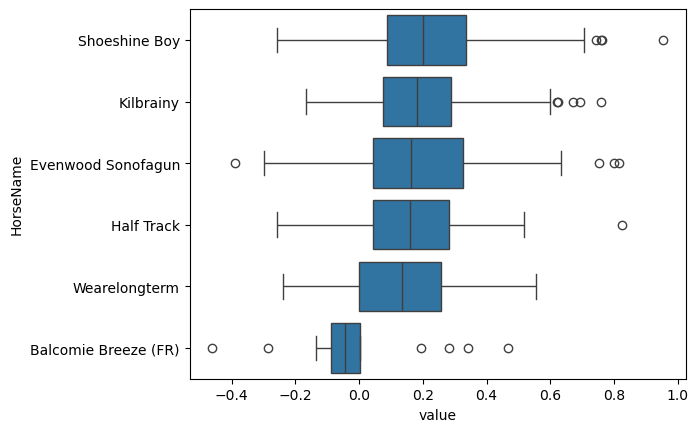

In [1234]:
sns.boxplot(sim_aa_w2_m, x='value', y='HorseName',order=sim_ord2)